In [76]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory



# Any results you write to the current directory are saved as output.

In [77]:
#Import Libraries
# Visual representation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

#### 1. Load the Datasets

In [82]:
session_df = pd.read_csv('session_related.csv')
delivery_df = pd.read_csv('delivery_related.csv')
outlier_df = pd.read_csv('generic_outliers_data.csv')

In [83]:
outlier_df.head()

,CustId,Age,EmailId,MobileNo,MacAddress,AvgPurchase,City,OccupationalLevel,IncomeLevel,Pincode
0,100,18,WCkD3InDq@gmail.com,4916661116,A7-17-AC-BB-87-09,3580,Baidyanadh Deoghar,Technical,very low,814112
1,101,18,iPjORQGqy@hotmail.com,8156912083,3D-E0-06-66-01-00,7585,Chakpirang,Non-technical,very low,795102
2,102,18,ShyCmCDbmB@aol.com,6663941231,3A-DE-69-A8-98-04,4456,Kala pahad,Non-technical,very low,795122
3,103,18,VdjRDafd@yahoo.com,3761853308,15-74-5C-91-78-E6,91474,Ukhrul,Technical,very high,795142
4,104,18,rLaKt3AxMK@gmail.com,7391938452,BA-6B-47-85-66-E7,62522,Kulittalai,Non-technical,high,639104


In [84]:
delivery_df.shape, delivery_df.dtypes

((100000, 17), CustId                  int64
 OrderId                 int64
 ProductId               int64
 IsValidAddress         object
 IsAddchangeRecently    object
 IsAddchangeonDel       object
 IsDeliveryRejected     object
 OriginalPrice           int64
 PaidPrice               int64
 OrderDate              object
 AddressChangeDate      object
 DeliveryDate           object
 ReplacementDate        object
 IsProductConsumable    object
 IsOneTimeUseProduct    object
 IsOfferCodeApplied     object
 Fraud                  object
 dtype: object)

#### Merge the three Dataframes to a single Dataframe

In [85]:
ds_merge_df = pd.merge(delivery_df,session_df,on='OrderId')

In [86]:
df = pd.merge(ds_merge_df,outlier_df,on='CustId')

In [88]:
df.shape

(100000, 31)

#### 2. Exploratory Data Analysis

In [12]:
# describe() method shows values like count, mean, standard deviation, etc. of numeric data types.
df.describe()

,CustId,OrderId,ProductId,OriginalPrice,PaidPrice,Session_Pincode,Delivery_Pincode
count,100000.00000,100000.000000,100000.000000,100000.00000,100000.00000,100000.00000,100000.000000
mean,50076.51905,50099.500000,50099.500000,5491.29768,5487.29895,563983.98808,563979.992390
std,28810.89187,28867.657797,28867.657797,2593.78428,2593.78457,205918.85053,205918.834943
min,100.00000,100.000000,100.000000,1000.00000,980.00000,121001.00000,120981.000000
25%,25177.00000,25099.750000,25099.750000,3250.00000,3245.75000,403705.00000,403691.000000
50%,50051.50000,50099.500000,50099.500000,5502.00000,5499.00000,585201.00000,585201.000000
75%,75043.00000,75099.250000,75099.250000,7730.00000,7726.00000,786125.00000,786125.000000
max,100097.00000,100099.000000,100099.000000,9999.00000,9999.00000,854301.00000,854301.000000


In [11]:
# Get the total missing values present in columns of both train and test dataset
df.isnull().sum()

CustId                 0
OrderId                0
ProductId              0
IsValidAddress         0
IsAddchangeRecently    0
IsAddchangeonDel       0
IsDeliveryRejected     0
OriginalPrice          0
PaidPrice              0
OrderDate              0
AddressChangeDate      0
DeliveryDate           0
ReplacementDate        0
IsProductConsumable    0
IsOneTimeUseProduct    0
IsOfferCodeApplied     0
Fraud                  0
IP_start_session       0
IP_end_session         0
Session_Pincode        0
Delivery_Pincode       0
IsValidGeo             0
dtype: int64

#### Data Visualization

Below is the function **"bar_chart"** which will take in a feature as a parameter and provide us the bar chart.

The Bar chart will show how the **transaction type** varies with different features and its subtypes.

In [13]:
def bar_chart(feature):
    normal = df[df['Fraud']=='normal'][feature].value_counts()
    suspicious = df[df['Fraud']=='suspicious'][feature].value_counts()      
    Fraud = df[df['Fraud']=='fraudulent'][feature].value_counts()
    bar_df = pd.DataFrame([normal,suspicious,Fraud])
    bar_df.index = ['Normal','Suspicious','Fraudulent']
    bar_df.plot(kind='bar',stacked=True, figsize=(7,5))

#### Relationship between Features and Target Variable
Now in the below section we are going to see how each features impacts the transaction type of a customer.

In [14]:
def feature_relationship(feature):
    print(df[feature].value_counts())
    print('--------------------------------------')
    print(df.groupby(feature).Fraud.value_counts())
    bar_chart(feature)
    

no     50010
yes    49990
Name: IsValidAddress, dtype: int64
--------------------------------------
IsValidAddress  Fraud     
no              normal        34802
                suspicious    12660
                fraudulent     2548
yes             normal        35198
                suspicious    12340
                fraudulent     2452
Name: Fraud, dtype: int64


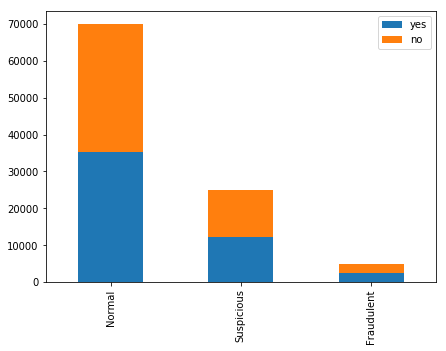

In [15]:
feature_relationship('IsValidAddress')

no     50047
yes    49953
Name: IsAddchangeRecently, dtype: int64
--------------------------------------
IsAddchangeRecently  Fraud     
no                   normal        35211
                     suspicious    12374
                     fraudulent     2462
yes                  normal        34789
                     suspicious    12626
                     fraudulent     2538
Name: Fraud, dtype: int64


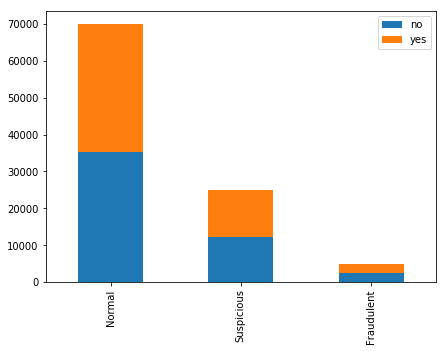

In [16]:
feature_relationship('IsAddchangeRecently')

no     50061
yes    49939
Name: IsAddchangeonDel, dtype: int64
--------------------------------------
IsAddchangeonDel  Fraud     
no                normal        35045
                  suspicious    12537
                  fraudulent     2479
yes               normal        34955
                  suspicious    12463
                  fraudulent     2521
Name: Fraud, dtype: int64


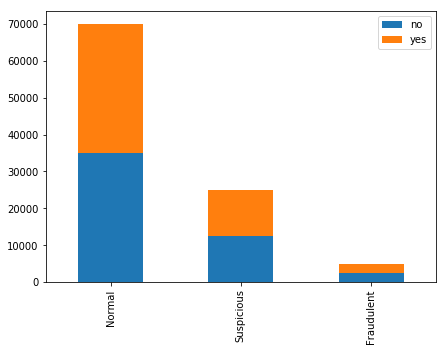

In [17]:
feature_relationship('IsAddchangeonDel')

yes    50154
no     49846
Name: IsDeliveryRejected, dtype: int64
--------------------------------------
IsDeliveryRejected  Fraud     
no                  normal        34838
                    suspicious    12488
                    fraudulent     2520
yes                 normal        35162
                    suspicious    12512
                    fraudulent     2480
Name: Fraud, dtype: int64


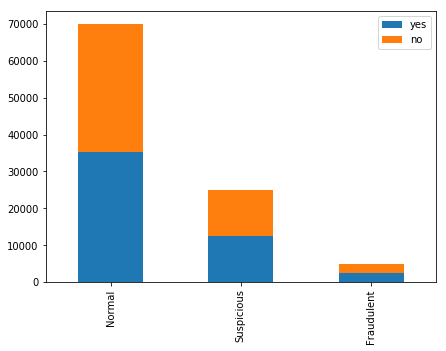

In [18]:
feature_relationship('IsDeliveryRejected') 

no     50109
yes    49891
Name: IsProductConsumable, dtype: int64
--------------------------------------
IsProductConsumable  Fraud     
no                   normal        35024
                     suspicious    12553
                     fraudulent     2532
yes                  normal        34976
                     suspicious    12447
                     fraudulent     2468
Name: Fraud, dtype: int64


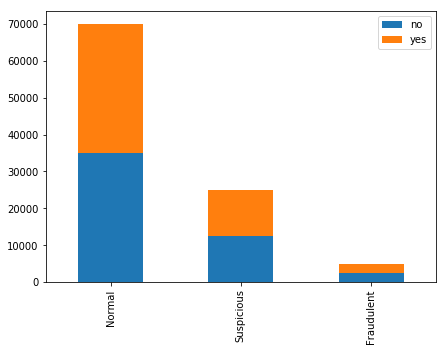

In [19]:
feature_relationship('IsProductConsumable')

no     50033
yes    49967
Name: IsOneTimeUseProduct, dtype: int64
--------------------------------------
IsOneTimeUseProduct  Fraud     
no                   normal        34963
                     suspicious    12498
                     fraudulent     2572
yes                  normal        35037
                     suspicious    12502
                     fraudulent     2428
Name: Fraud, dtype: int64


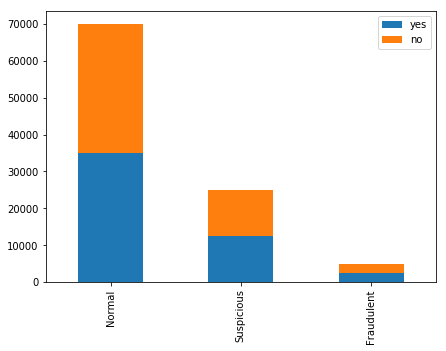

In [20]:
feature_relationship('IsOneTimeUseProduct')

no     50008
yes    49992
Name: IsOfferCodeApplied, dtype: int64
--------------------------------------
IsOfferCodeApplied  Fraud     
no                  normal        35080
                    suspicious    12493
                    fraudulent     2435
yes                 normal        34920
                    suspicious    12507
                    fraudulent     2565
Name: Fraud, dtype: int64


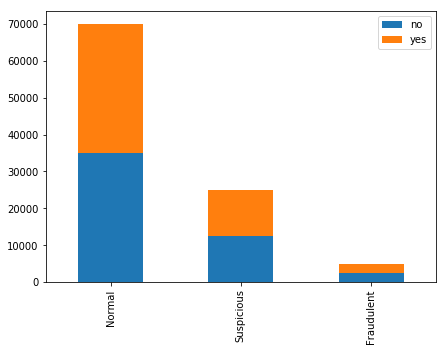

In [21]:
feature_relationship('IsOfferCodeApplied')

YES    50162
NO     49838
Name: IsValidGeo, dtype: int64
--------------------------------------
IsValidGeo  Fraud     
NO          normal        34800
            suspicious    12538
            fraudulent     2500
YES         normal        35200
            suspicious    12462
            fraudulent     2500
Name: Fraud, dtype: int64


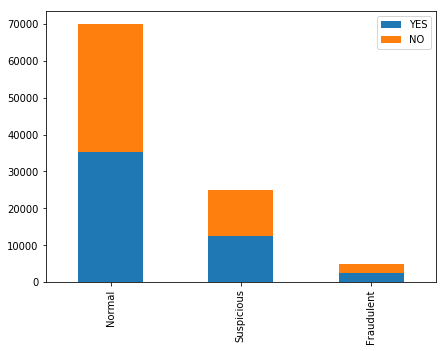

In [22]:
feature_relationship('IsValidGeo')

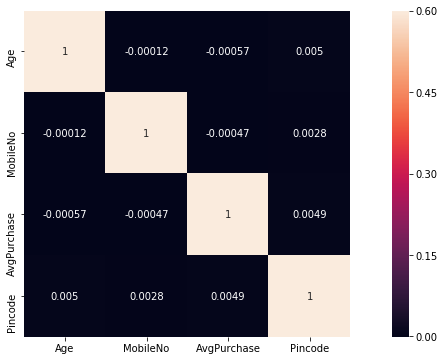

In [89]:
#Correlating Features
drop_features = ['CustId','OrderId','ProductId','OriginalPrice','PaidPrice','Session_Pincode','Delivery_Pincode']
plt.figure(figsize=(15,6))
sns.heatmap(df.drop(drop_features,axis=1).corr(), vmax=0.6, square=True, annot=True)

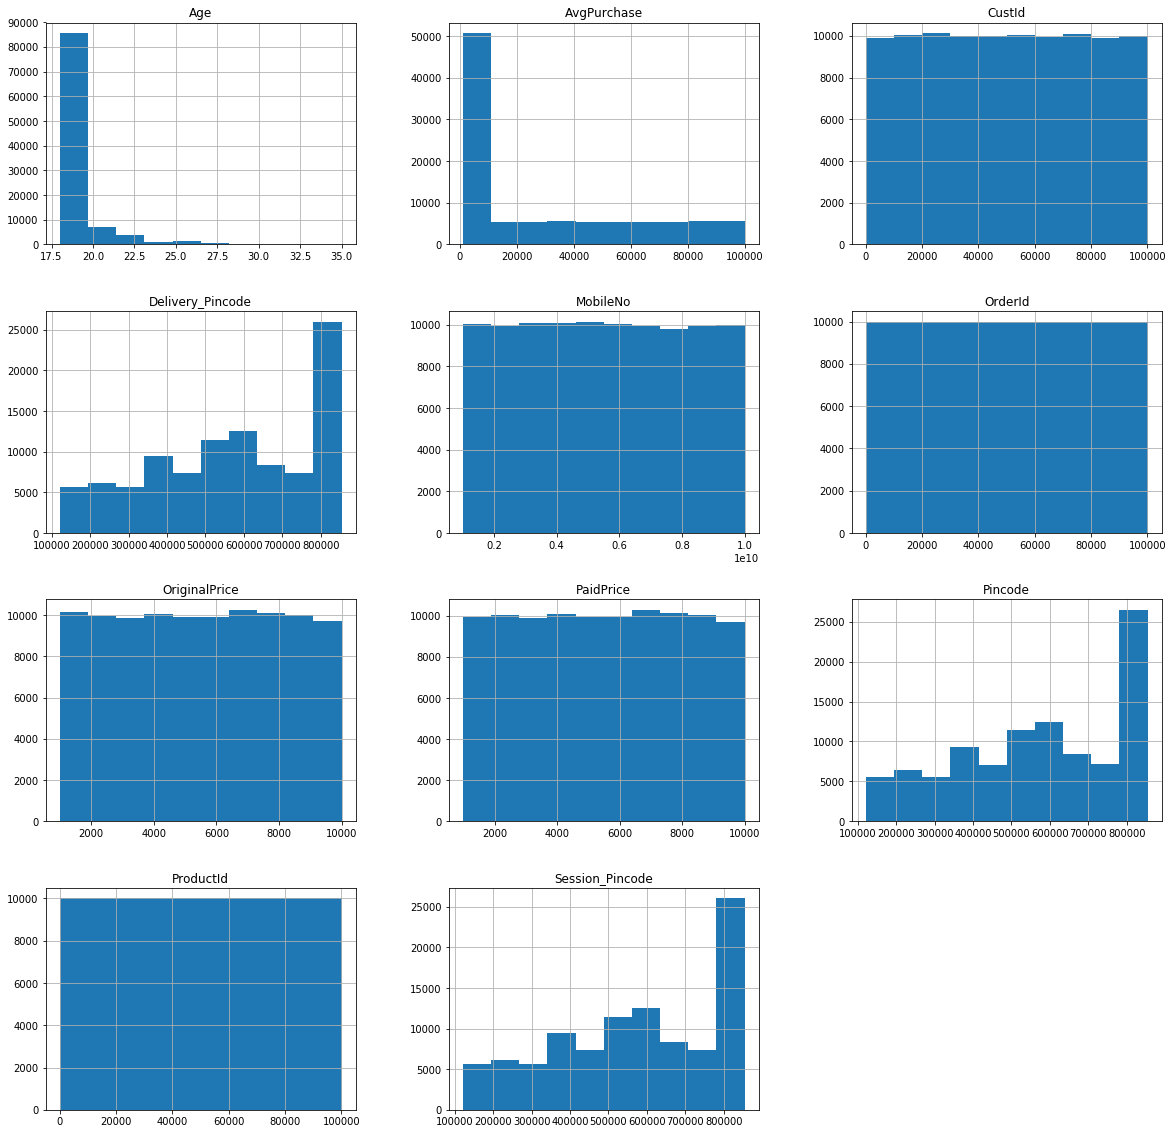

In [39]:
# print histogram for each parameter
df.hist(figsize=(20,20))
plt.show()

In [93]:
from sklearn.preprocessing import LabelEncoder
categorical = ['IncomeLevel','OccupationalLevel','IsValidAddress','IsAddchangeRecently','IsAddchangeonDel','IsDeliveryRejected','IsProductConsumable','IsOneTimeUseProduct','IsOfferCodeApplied','IsValidGeo']

label_encoder = LabelEncoder()
for col in categorical:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

df=df.iloc[:df.shape[0]]

Fraud
fraudulent    AxesSubplot(0.125,0.125;0.775x0.755)
normal        AxesSubplot(0.125,0.125;0.775x0.755)
suspicious    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

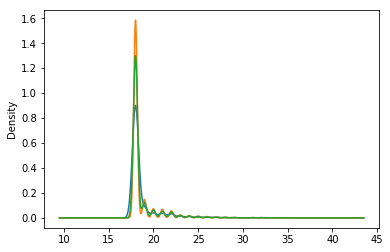

In [94]:
df.groupby('Fraud').Age.plot(kind='kde')

Fraud
fraudulent    AxesSubplot(0.125,0.125;0.775x0.755)
normal        AxesSubplot(0.125,0.125;0.775x0.755)
suspicious    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

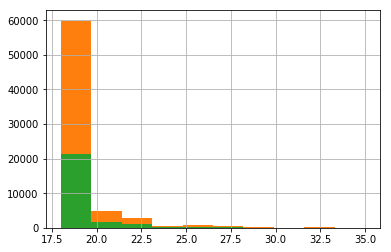

In [95]:
df.groupby('Fraud').Age.hist()

In [96]:
df['AgeGroup'] = pd.cut(df['Age'], [10,15,18,21,24,27,30,33,35,40,50,100],
                            labels=['0', '1', '2','3','4','5','6','7','8','9','10'])
df.head()

D:\miniconda\envs\ml\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,CustId,OrderId,ProductId,IsValidAddress,IsAddchangeRecently,IsAddchangeonDel,IsDeliveryRejected,OriginalPrice,PaidPrice,OrderDate,...,Age,EmailId,MobileNo,MacAddress,AvgPurchase,City,OccupationalLevel,IncomeLevel,Pincode,AgeGroup
0,47019,41601,41601,1,0,1,1,2711,2711,25/01/2019,...,23,aQGHuxe@yahoo.com,1867946110,1D-BA-45-3F-E5-43,99522,Latur,0,3,413512,3
1,20242,30352,30352,0,1,0,0,2713,2710,06/02/2019,...,18,sej94kG@hotmail.com,9272875375,65-D1-F3-62-F7-44,3491,Mumbai G.P.O.,0,4,400001,1
2,79619,12328,12328,1,0,1,1,4146,4142,12/01/2019,...,18,HTVm_XUBz@gmail.com,3251871005,DF-6D-BF-6C-23-59,5262,Chhatarpur City,1,4,471001,1
3,79619,80750,80750,0,1,0,0,2662,2662,19/01/2019,...,18,HTVm_XUBz@gmail.com,3251871005,DF-6D-BF-6C-23-59,5262,Chhatarpur City,1,4,471001,1
4,80669,19203,19203,1,0,1,0,2709,2707,27/03/2019,...,18,dPiRkMo3i@gmail.com,3152175434,49-55-60-A5-F5-2B,4957,Sunamura,0,4,799131,1


In [44]:
df['domain'] = df['EmailId'].str.split('@').str[1]
df.head()

,CustId,OrderId,ProductId,IsValidAddress,IsAddchangeRecently,IsAddchangeonDel,IsDeliveryRejected,OriginalPrice,PaidPrice,OrderDate,...,EmailId,MobileNo,MacAddress,AvgPurchase,City,OccupationalLevel,IncomeLevel,Pincode,AgeGroup,domain
0,47019,41601,41601,1,0,1,1,2711,2711,25/01/2019,...,aQGHuxe@yahoo.com,1867946110,1D-BA-45-3F-E5-43,99522,Latur,0,3,413512,3,yahoo.com
1,20242,30352,30352,0,1,0,0,2713,2710,06/02/2019,...,sej94kG@hotmail.com,9272875375,65-D1-F3-62-F7-44,3491,Mumbai G.P.O.,0,4,400001,1,hotmail.com
2,79619,12328,12328,1,0,1,1,4146,4142,12/01/2019,...,HTVm_XUBz@gmail.com,3251871005,DF-6D-BF-6C-23-59,5262,Chhatarpur City,1,4,471001,1,gmail.com
3,79619,80750,80750,0,1,0,0,2662,2662,19/01/2019,...,HTVm_XUBz@gmail.com,3251871005,DF-6D-BF-6C-23-59,5262,Chhatarpur City,1,4,471001,1,gmail.com
4,80669,19203,19203,1,0,1,0,2709,2707,27/03/2019,...,dPiRkMo3i@gmail.com,3152175434,49-55-60-A5-F5-2B,4957,Sunamura,0,4,799131,1,gmail.com


In [45]:
df.domain.unique()

array(['yahoo.com', 'hotmail.com', 'gmail.com', 'aol.com', 'mail.com'],
      dtype=object)

hotmail.com    20174
mail.com       20117
yahoo.com      20054
gmail.com      19860
aol.com        19795
Name: domain, dtype: int64
--------------------------------------
domain       Fraud     
aol.com      normal        13852
             suspicious     4903
             fraudulent     1040
gmail.com    normal        13850
             suspicious     5044
             fraudulent      966
hotmail.com  normal        14097
             suspicious     5075
             fraudulent     1002
mail.com     normal        14121
             suspicious     5027
             fraudulent      969
yahoo.com    normal        14080
             suspicious     4951
             fraudulent     1023
Name: Fraud, dtype: int64


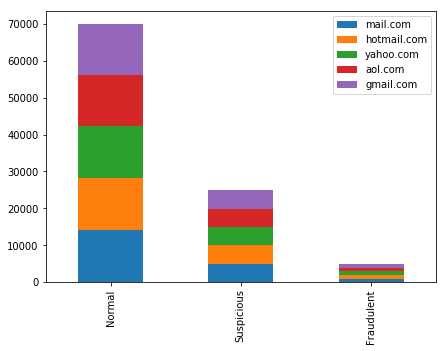

In [46]:
feature_relationship('domain')

In [30]:
def ip_to_int(ip_ser):
    ips = ip_ser.str.split('.', expand=True).astype(np.int16).values
    mults = np.tile(np.array([24, 16, 8, 0]), len(ip_ser)).reshape(ips.shape)
    return np.sum(np.left_shift(ips, mults), axis=1)

In [31]:
df['_IP_start_session'] = ip_to_int(df.IP_start_session)
df['_IP_end_session'] = ip_to_int(df.IP_end_session)
df.head()


,CustId,OrderId,ProductId,IsValidAddress,IsAddchangeRecently,IsAddchangeonDel,IsDeliveryRejected,OriginalPrice,PaidPrice,OrderDate,...,IsOneTimeUseProduct,IsOfferCodeApplied,Fraud,IP_start_session,IP_end_session,Session_Pincode,Delivery_Pincode,IsValidGeo,_IP_start_session,_IP_end_session
0,47019,41601,41601,1,0,1,1,2711,2711,25/01/2019,...,0,0,normal,99.55.251.225,99.55.251.225,276001,276001,1,1664613345,1664613345
1,20242,30352,30352,0,1,0,0,2713,2710,06/02/2019,...,1,0,normal,206.253.101.58,206.253.101.58,505468,505456,1,-822254278,-822254278
2,79619,12328,12328,1,0,1,1,4146,4142,12/01/2019,...,0,1,suspicious,151.250.152.84,151.250.152.84,586209,586208,0,-1745184684,-1745184684
3,80669,19203,19203,1,0,1,0,2709,2707,27/03/2019,...,0,1,normal,91.253.4.00,91.253.4.00,250001,249986,1,1543308288,1543308288
4,64577,19842,19842,0,0,0,1,8815,8811,17/01/2019,...,0,1,normal,228.1.1.251,228.1.1.251,799277,799257,1,-469696005,-469696005


In [97]:
df['OrderDate'] =  pd.to_datetime(df['OrderDate'],format='%d/%m/%Y')
df['AddressChangeDate'] =  pd.to_datetime(df['AddressChangeDate'],format='%d/%m/%Y')
df['DeliveryDate'] =  pd.to_datetime(df['DeliveryDate'],format='%d/%m/%Y')
df['ReplacementDate'] =  pd.to_datetime(df['ReplacementDate'],format='%d/%m/%Y')
df.head()

D:\miniconda\envs\ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\miniconda\envs\ml\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\miniconda\envs\ml\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

,CustId,OrderId,ProductId,IsValidAddress,IsAddchangeRecently,IsAddchangeonDel,IsDeliveryRejected,OriginalPrice,PaidPrice,OrderDate,...,Age,EmailId,MobileNo,MacAddress,AvgPurchase,City,OccupationalLevel,IncomeLevel,Pincode,AgeGroup
0,47019,41601,41601,1,0,1,1,2711,2711,2019-01-25,...,23,aQGHuxe@yahoo.com,1867946110,1D-BA-45-3F-E5-43,99522,Latur,0,3,413512,3
1,20242,30352,30352,0,1,0,0,2713,2710,2019-02-06,...,18,sej94kG@hotmail.com,9272875375,65-D1-F3-62-F7-44,3491,Mumbai G.P.O.,0,4,400001,1
2,79619,12328,12328,1,0,1,1,4146,4142,2019-01-12,...,18,HTVm_XUBz@gmail.com,3251871005,DF-6D-BF-6C-23-59,5262,Chhatarpur City,1,4,471001,1
3,79619,80750,80750,0,1,0,0,2662,2662,2019-01-19,...,18,HTVm_XUBz@gmail.com,3251871005,DF-6D-BF-6C-23-59,5262,Chhatarpur City,1,4,471001,1
4,80669,19203,19203,1,0,1,0,2709,2707,2019-03-27,...,18,dPiRkMo3i@gmail.com,3152175434,49-55-60-A5-F5-2B,4957,Sunamura,0,4,799131,1


In [98]:
def extract_date(df,column):
    df[column+"_year"] = df[column].apply(lambda x: x.year) 
    df[column+"_month"] = df[column].apply(lambda x: x.month)
    df[column+"_date"] = df[column].apply(lambda x: x.day)    

In [99]:
extract_date(df,'OrderDate')
extract_date(df,'AddressChangeDate')
extract_date(df,'DeliveryDate')
extract_date(df,'ReplacementDate')
df.head()

D:\miniconda\envs\ml\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\miniconda\envs\ml\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\miniconda\envs\ml\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,CustId,OrderId,ProductId,IsValidAddress,IsAddchangeRecently,IsAddchangeonDel,IsDeliveryRejected,OriginalPrice,PaidPrice,OrderDate,...,OrderDate_date,AddressChangeDate_year,AddressChangeDate_month,AddressChangeDate_date,DeliveryDate_year,DeliveryDate_month,DeliveryDate_date,ReplacementDate_year,ReplacementDate_month,ReplacementDate_date
0,47019,41601,41601,1,0,1,1,2711,2711,2019-01-25,...,25,2018,11,20,2019,1,28,2019,2,1
1,20242,30352,30352,0,1,0,0,2713,2710,2019-02-06,...,6,2019,2,3,2019,2,10,2019,2,17
2,79619,12328,12328,1,0,1,1,4146,4142,2019-01-12,...,12,2018,7,30,2019,1,22,2019,2,1
3,79619,80750,80750,0,1,0,0,2662,2662,2019-01-19,...,19,2018,9,15,2019,1,26,2019,1,31
4,80669,19203,19203,1,0,1,0,2709,2707,2019-03-27,...,27,2018,6,14,2019,4,3,2019,4,6


In [100]:
df.head()

,CustId,OrderId,ProductId,IsValidAddress,IsAddchangeRecently,IsAddchangeonDel,IsDeliveryRejected,OriginalPrice,PaidPrice,OrderDate,...,OrderDate_date,AddressChangeDate_year,AddressChangeDate_month,AddressChangeDate_date,DeliveryDate_year,DeliveryDate_month,DeliveryDate_date,ReplacementDate_year,ReplacementDate_month,ReplacementDate_date
0,47019,41601,41601,1,0,1,1,2711,2711,2019-01-25,...,25,2018,11,20,2019,1,28,2019,2,1
1,20242,30352,30352,0,1,0,0,2713,2710,2019-02-06,...,6,2019,2,3,2019,2,10,2019,2,17
2,79619,12328,12328,1,0,1,1,4146,4142,2019-01-12,...,12,2018,7,30,2019,1,22,2019,2,1
3,79619,80750,80750,0,1,0,0,2662,2662,2019-01-19,...,19,2018,9,15,2019,1,26,2019,1,31
4,80669,19203,19203,1,0,1,0,2709,2707,2019-03-27,...,27,2018,6,14,2019,4,3,2019,4,6


In [101]:
# delete unnecessary feature from dataset

print("Before", df.shape)
features_drop = ['EmailId','MobileNo','MacAddress','City','Pincode', 'IP_start_session', 'IP_end_session',
                'CustId','OrderId','ProductId','OrderDate', 'AddressChangeDate','DeliveryDate',
                'ReplacementDate']
train_data = df.drop(features_drop, axis=1)
labels = train_data['Fraud']
features = train_data.drop('Fraud', axis=1)
print("After",train_data.shape)

Before (100000, 44)
After (100000, 30)


In [102]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
features = features.apply(LabelEncoder().fit_transform)
features.head()

,IsValidAddress,IsAddchangeRecently,IsAddchangeonDel,IsDeliveryRejected,OriginalPrice,PaidPrice,IsProductConsumable,IsOneTimeUseProduct,IsOfferCodeApplied,Session_Pincode,...,OrderDate_date,AddressChangeDate_year,AddressChangeDate_month,AddressChangeDate_date,DeliveryDate_year,DeliveryDate_month,DeliveryDate_date,ReplacementDate_year,ReplacementDate_month,ReplacementDate_date
0,1,0,1,1,1711,1728,1,0,0,134,...,24,0,10,19,0,0,27,0,1,0
1,0,1,0,0,1713,1727,1,1,0,383,...,5,1,1,2,0,1,9,0,1,16
2,1,0,1,1,3146,3159,1,0,1,522,...,11,0,6,29,0,0,21,0,1,0
3,0,1,0,0,1662,1679,1,1,1,787,...,18,0,8,14,0,0,25,0,0,30
4,1,0,1,0,1709,1724,1,0,1,112,...,26,0,5,13,0,3,2,0,3,5


In [103]:
# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [104]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
encoder.fit(labels)
labels_enc = encoder.transform(labels)

In [105]:
labels_enc

array([1, 1, 2, ..., 1, 1, 1], dtype=int64)

In [106]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.fit(features)
train_df = pca.transform(features)


In [107]:
train_df

array([[-1.48496765e+00, -9.66571425e-01,  1.67349428e+00, ...,
         7.21781371e-16,  2.22790909e-16,  7.19040469e-27],
       [ 5.34097656e-02, -1.67996451e+00,  5.98939733e-01, ...,
         3.80249675e-16, -1.00184291e-16, -5.64713287e-26],
       [-1.54874296e+00, -8.17601020e-01, -1.80274456e-01, ...,
        -5.99331914e-16, -3.69613690e-18,  5.67789350e-26],
       ...,
       [ 1.87117539e+00,  9.24420135e-01, -1.65661756e+00, ...,
         2.13749215e-16,  4.70191113e-17, -4.10228486e-26],
       [ 1.48182919e+00, -3.47048458e-01, -1.81496439e+00, ...,
        -2.77147764e-16,  9.12510183e-17, -7.67295748e-26],
       [ 1.29510958e-02, -5.55624590e-01,  2.35304701e+00, ...,
        -7.56512027e-16,  2.46443790e-18, -2.00947160e-26]])

In [108]:
from sklearn.model_selection import train_test_split
train, test, labels_train, labels_test = train_test_split(train_df, labels_enc, test_size=0.98, random_state = 42)

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train, labels_train, test_size=0.10, random_state = 42)

In [110]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1800, 29), (200, 29), (1800,), (200,))

## SVM Hyperparameter tuning



In [111]:
parameter_candidates = [
  {'C': [5, 10], 'kernel': ['linear']},
  {'C': [1, 10], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

In [112]:
# Create a classifier object with the classifier and parameter candidates
clf = GridSearchCV(estimator=SVC(), param_grid=parameter_candidates, n_jobs=-1)

# Train the classifier on data1's feature and target data
clf.fit(X_train, y_train)   

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': [5, 10], 'kernel': ['linear']}, {'C': [1, 10], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [113]:
# View the accuracy score
print('Best score for data1:', clf.best_score_)

Best score for data1: 0.6911111111111111


In [114]:
# Apply the classifier trained using data1 to data2, and view the accuracy score
clf.score(X_val, y_val)  

0.71

In [115]:
clf.best_params_

{'C': 5, 'kernel': 'linear'}

In [116]:
# View the best parameters for the model found using grid search
print('Best C:',clf.best_estimator_.C) 
print('Best Kernel:',clf.best_estimator_.kernel)
print('Best Gamma:',clf.best_estimator_.gamma)

Best C: 5
Best Kernel: linear
Best Gamma: auto


In [117]:
SVC(C=5, kernel='linear', gamma='auto').fit(X_train, y_train).score(X_val, y_val)

0.71

In [118]:
from sklearn.svm import LinearSVC
LinearSVC(random_state=0, tol=1e-5,penalty='l2',dual=False).fit(X_train, y_train).score(X_val, y_val)

0.71

In [119]:
y_pred = clf.predict(X_val)

In [120]:
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_pred,y_val))

Accuracy: 0.71


In [121]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_pred,y_val,average=None))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_pred,y_val,average=None))


print("F1 score:",metrics.f1_score(y_pred,y_val,average=None))

#f1_scores[clf_name] = f1_score(y_pred, y_valid)

Precision: [0. 1. 0.]
Recall: [0.   0.71 0.  ]
F1 score: [0.         0.83040936 0.        ]


D:\miniconda\envs\ml\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
D:\miniconda\envs\ml\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
